In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Visualizing the relationship between two numerical variables with a scatterplot is easy using sns.relplot().

In [143]:
data = pd.read_csv('SOCR-HeightWeight.csv') # reading csv from kaggle
data= data.head(500)

In [144]:
data.isnull().sum() # cheacking for Nan values in dataset

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [145]:
# setting first name as index column
data.set_index("Index", inplace = True)

In [146]:
data.describe()

Height(Inches)  Weight(Pounds)
count      500.000000      500.000000
mean        68.011371      127.216975
std          1.904719       11.900698
min         62.016660       84.359800
25%         66.699150      119.485000
50%         68.022415      127.373800
75%         69.259142      135.005275
max         73.901070      168.229000

In [147]:
#height = data["Height(Inches)"].values
#weight= data["Weight(Pounds)"].values
#plt.scatter(weight, height)

In [148]:
#convert height into cm and weight into kg
data["Height(cm)"] = data["Height(Inches)"] * 2.54
data["Weight(kg)"] = data["Weight(Pounds)"] * 0.45359237
data

Height(Inches)  Weight(Pounds)  Height(cm)  Weight(kg)
Index                                                        
1            65.78331        112.9925  167.089607   51.252536
2            71.51521        136.4873  181.648633   61.909598
3            69.39874        153.0269  176.272800   69.411834
4            68.21660        142.3354  173.270164   64.562251
5            67.78781        144.2971  172.181037   65.452064
...               ...             ...         ...         ...
496          66.82802        142.1577  169.743171   64.481648
497          69.09424        127.1436  175.499370   57.671367
498          66.81425        122.3353  169.708195   55.490359
499          67.13183        112.6659  170.514848   51.104393
500          64.57428        134.2647  164.018671   60.901443

[500 rows x 4 columns]

In [149]:
data = data.drop(["Height(Inches)", "Weight(Pounds)"], axis = 1)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Height(cm)  500 non-null    float64
 1   Weight(kg)  500 non-null    float64
dtypes: float64(2)
memory usage: 11.7 KB


In [151]:
#spliting data and to get a Numpy representation of the DataFrame(.value) lr always works on array
Height = data["Height(cm)"].values
Weight = data["Weight(kg)"].values

In [152]:
#reshape otherwise you will get error as "raise ValueError("x and y must be the same size")
new_weight = weight.reshape(-1,1)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(new_weight, Height, train_size=.8 )
lm = LinearRegression() #creating LinearRegression model
lm.fit(x_train, y_train) #train the model using training data 
y_predict = lm.predict(x_test) # get the regression line

Train accuracy 23.49 %
Test accuracy 26.42 %


In [ ]:
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %") # accuracy score for traning data
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")    # accuracy for testing data

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

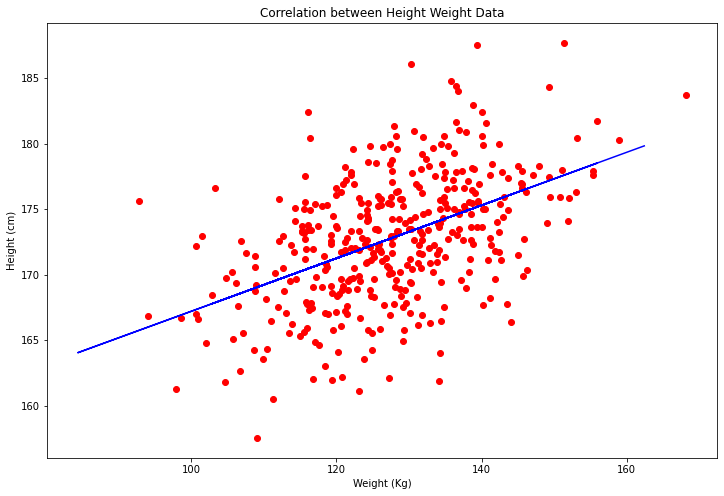

In [186]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test,y_predict, color='blue')
plt.xlabel("Weight (Kg)")
plt.ylabel("Height (cm)")
plt.title("Correlation between Height Weight Data")
plt.plot

Text(0.5, 1.0, 'Correlation between Height Weight Data')

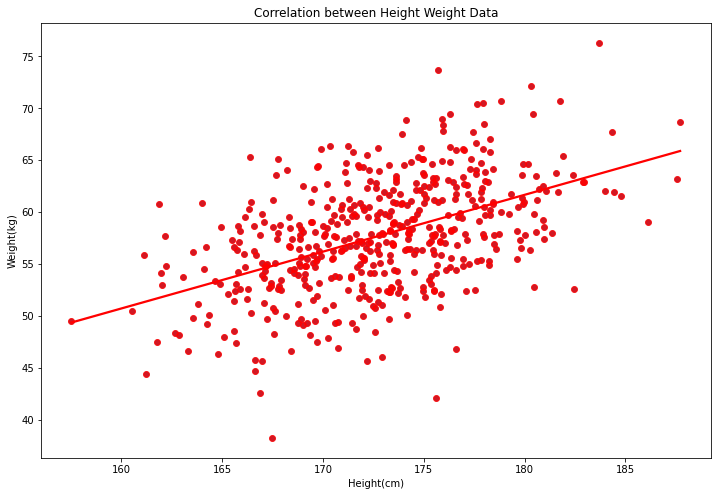

In [195]:
# using seaborn librabiry

fig = plt.subplots(figsize = (12,8))

## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot(x= "Height(cm)", y = "Weight(kg)" , data=data)

## Putting a regression line. 
sns.regplot(x= "Height(cm)", y = "Weight(kg)" , data=data, color="red",ci=None)

plt.title("Correlation between Height Weight Data")

#Conclusions

1.Height and Weight are loosely positvely correlated

2.There may be more varability of heights in the middle weights, but that could also just have to do with the fact that there are more data points in the middle weights

3.There are many other factors that affect weight other than height.